<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Mental_Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Dataset-Mental-Disorders.csv")
df

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [ ]:
# lets check the info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [3]:
# columns: and total records:
print(f"Total Records are:{df.shape}\n")
print(f"columns:\n{df.columns}")

Total Records are:(120, 19)

columns:
Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')


In [4]:
# lets fill the spaces:
df.columns = df.columns.str.replace(" ","_")

In [ ]:
df.columns

Index(['Patient_Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep_dissorder',
       'Mood_Swing', 'Suicidal_thoughts', 'Anorxia', 'Authority_Respect',
       'Try-Explanation', 'Aggressive_Response', 'Ignore_&_Move-On',
       'Nervous_Break-down', 'Admit_Mistakes', 'Overthinking',
       'Sexual_Activity', 'Concentration', 'Optimisim', 'Expert_Diagnose'],
      dtype='object')

In [5]:
# lets chcek the output data is in proportion ??
df.Expert_Diagnose.value_counts(normalize=True)*100

Bipolar Type-2    25.833333
Depression        25.833333
Normal            25.000000
Bipolar Type-1    23.333333
Name: Expert_Diagnose, dtype: float64

In [ ]:
# lets see the Excitement and Sadness of patients which leads towards Expert Diagnose
df[['Euphoric','Sadness','Expert_Diagnose']]

,Euphoric,Sadness,Expert_Diagnose
0,Seldom,Usually,Bipolar Type-2
1,Seldom,Usually,Depression
2,Most-Often,Sometimes,Bipolar Type-1
3,Seldom,Usually,Bipolar Type-2
4,Usually,Usually,Normal
...,...,...,...
115,Seldom,Most-Often,Depression
116,Sometimes,Sometimes,Bipolar Type-1
117,Sometimes,Usually,Bipolar Type-2
118,Sometimes,Usually,Depression


In [ ]:
# lets see the Excitement and Sadness of patients which leads towards Expert Diagnose
df[['Euphoric','Sadness','Expert_Diagnose']][(df.Euphoric == "Seldom")& (df.Sadness == "Most-Often")]

,Euphoric,Sadness,Expert_Diagnose
8,Seldom,Most-Often,Bipolar Type-2
18,Seldom,Most-Often,Depression
35,Seldom,Most-Often,Depression
41,Seldom,Most-Often,Bipolar Type-2
44,Seldom,Most-Often,Depression
47,Seldom,Most-Often,Bipolar Type-2
52,Seldom,Most-Often,Depression
54,Seldom,Most-Often,Bipolar Type-2
63,Seldom,Most-Often,Bipolar Type-2
79,Seldom,Most-Often,Depression


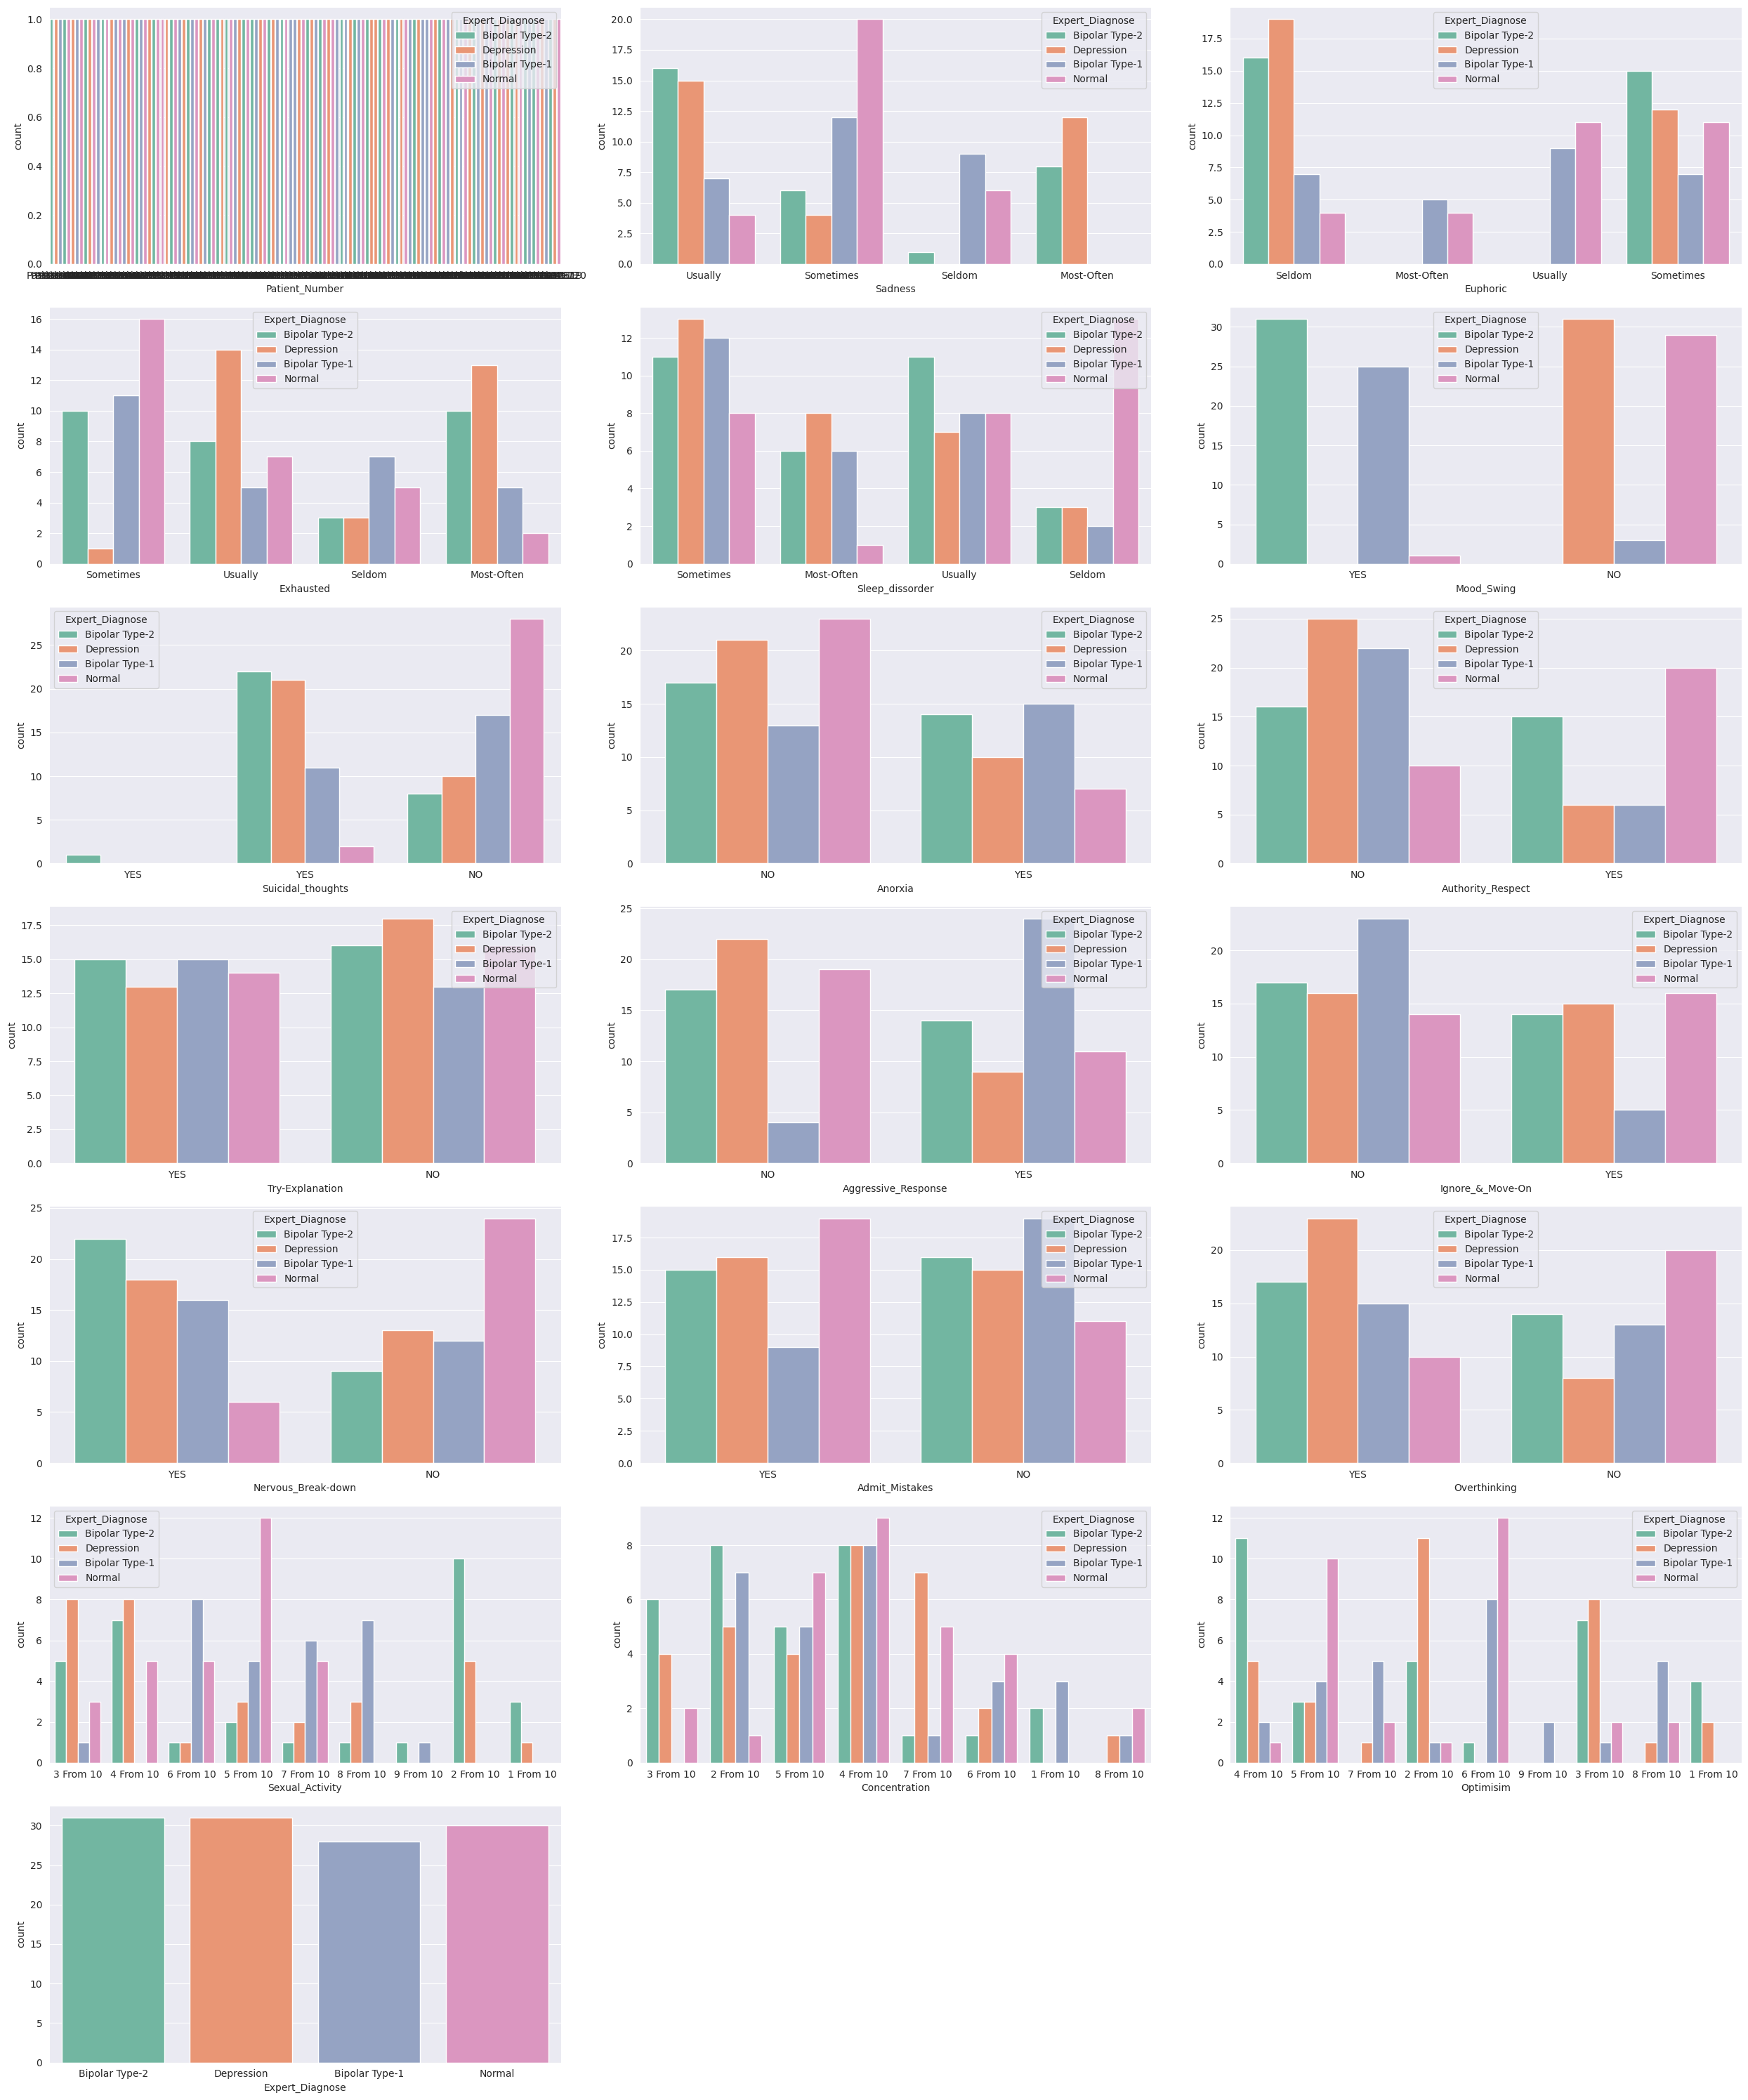

In [ ]:
plt.figure(figsize=(25,30))
sns.set_style("darkgrid")
sns.set_palette("Set2")
col = df.columns
i = 1
for col in col:
  plt.subplot(7,3,i)
  sns.countplot(data=df,x=col,hue="Expert_Diagnose")
  i+=1
  plt.tight_layout()

     Exhausted Expert_Diagnose  Counts
0    Sometimes          Normal      16
1      Usually      Depression      14
2   Most-Often      Depression      13
3    Sometimes  Bipolar Type-1      11
4   Most-Often  Bipolar Type-2      10
5    Sometimes  Bipolar Type-2      10
6      Usually  Bipolar Type-2       8
7       Seldom  Bipolar Type-1       7
8      Usually          Normal       7
9   Most-Often  Bipolar Type-1       5
10      Seldom          Normal       5
11     Usually  Bipolar Type-1       5
12      Seldom  Bipolar Type-2       3
13      Seldom      Depression       3
14  Most-Often          Normal       2
15   Sometimes      Depression       1


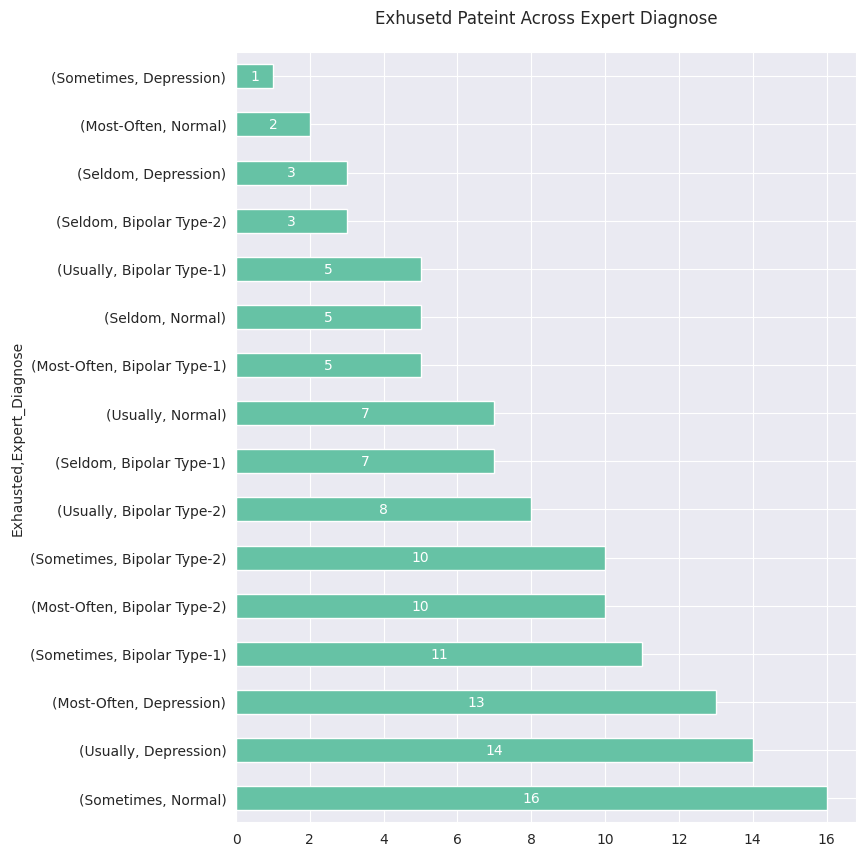

**************************************************************************************************************************************************************************
  Authority_Respect Expert_Diagnose  Counts
0                NO      Depression      25
1                NO  Bipolar Type-1      22
2               YES          Normal      20
3                NO  Bipolar Type-2      16
4               YES  Bipolar Type-2      15
5                NO          Normal      10
6               YES  Bipolar Type-1       6
7               YES      Depression       6 



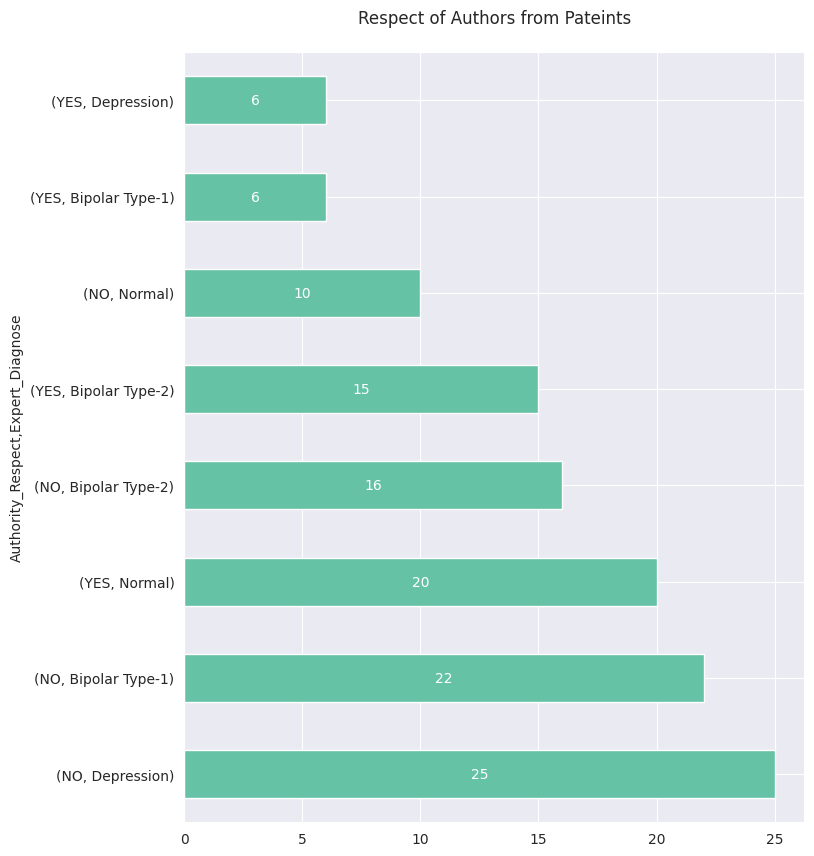

**************************************************************************************************************************************************************************
   Sleep_dissorder Expert_Diagnose  Counts
0           Seldom          Normal      13
1        Sometimes      Depression      13
2        Sometimes  Bipolar Type-1      12
3        Sometimes  Bipolar Type-2      11
4          Usually  Bipolar Type-2      11
5       Most-Often      Depression       8
6        Sometimes          Normal       8
7          Usually  Bipolar Type-1       8
8          Usually          Normal       8
9          Usually      Depression       7
10      Most-Often  Bipolar Type-1       6
11      Most-Often  Bipolar Type-2       6
12          Seldom  Bipolar Type-2       3
13          Seldom      Depression       3
14          Seldom  Bipolar Type-1       2
15      Most-Often          Normal       1 



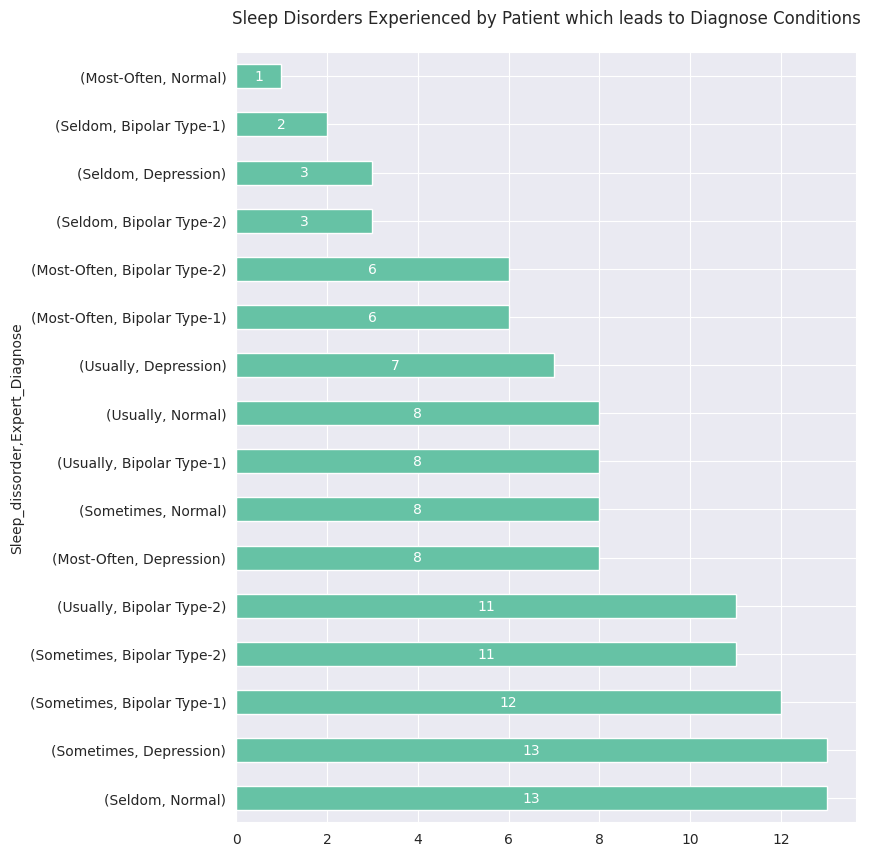

**************************************************************************************************************************************************************************
  Aggressive_Response Expert_Diagnose  Counts
0                 YES  Bipolar Type-1      24
1                  NO      Depression      22
2                  NO          Normal      19
3                  NO  Bipolar Type-2      17
4                 YES  Bipolar Type-2      14
5                 YES          Normal      11
6                 YES      Depression       9
7                  NO  Bipolar Type-1       4 



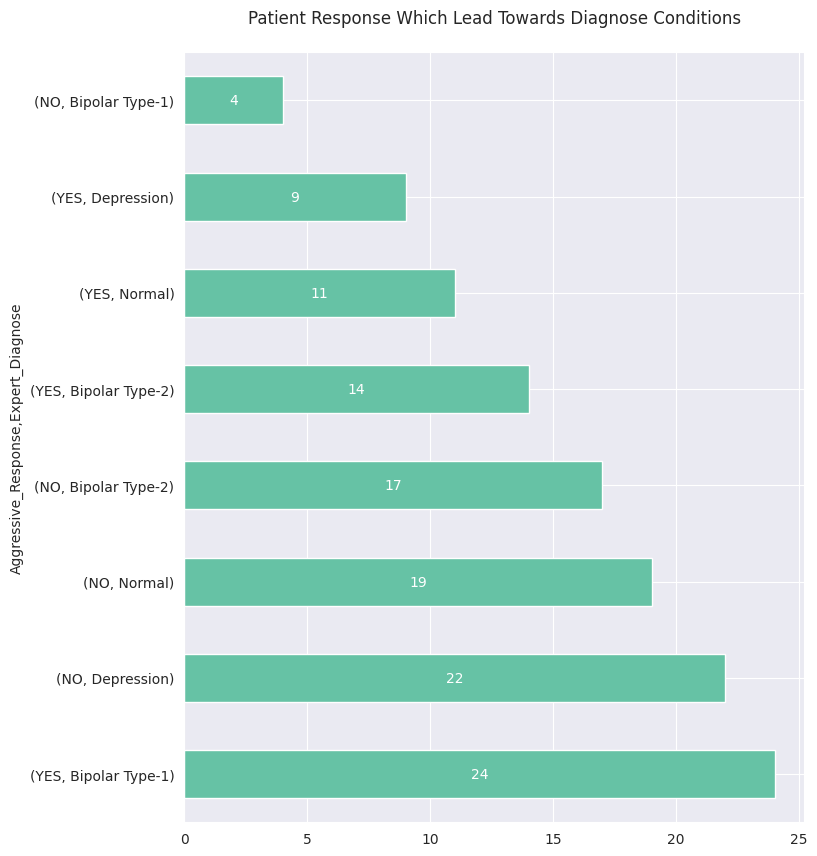

**************************************************************************************************************************************************************************
  Ignore_&_Move-On Expert_Diagnose  Counts
0               NO  Bipolar Type-1      23
1               NO  Bipolar Type-2      17
2               NO      Depression      16
3              YES          Normal      16
4              YES      Depression      15
5               NO          Normal      14
6              YES  Bipolar Type-2      14
7              YES  Bipolar Type-1       5 



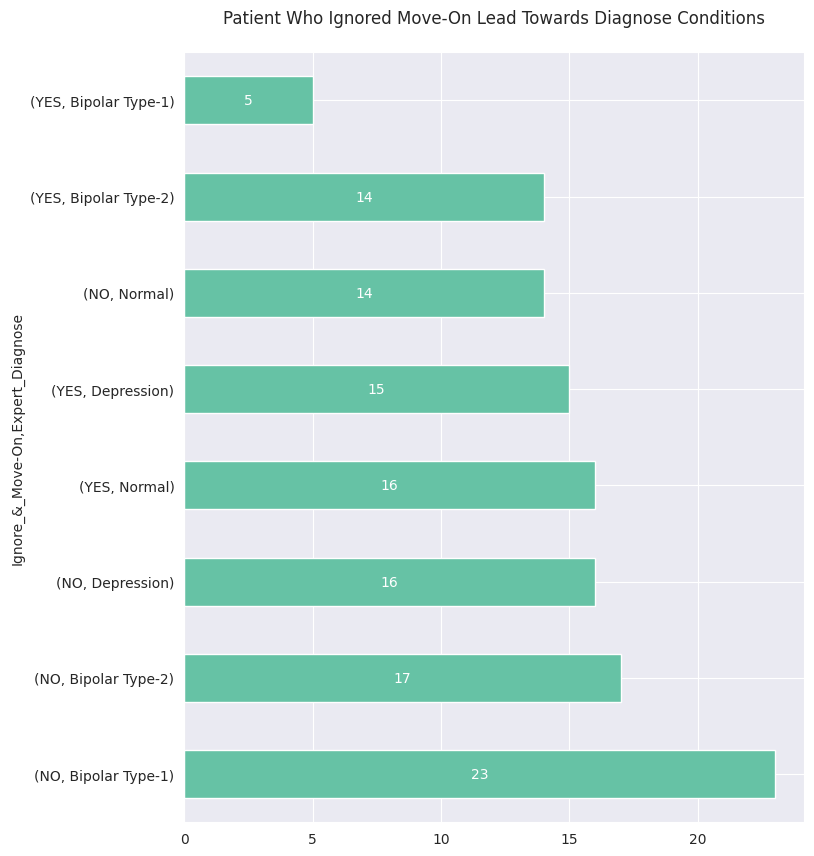

**************************************************************************************************************************************************************************
  Nervous_Break-down Expert_Diagnose  Counts
0                 NO          Normal      24
1                YES  Bipolar Type-2      22
2                YES      Depression      18
3                YES  Bipolar Type-1      16
4                 NO      Depression      13
5                 NO  Bipolar Type-1      12
6                 NO  Bipolar Type-2       9
7                YES          Normal       6 



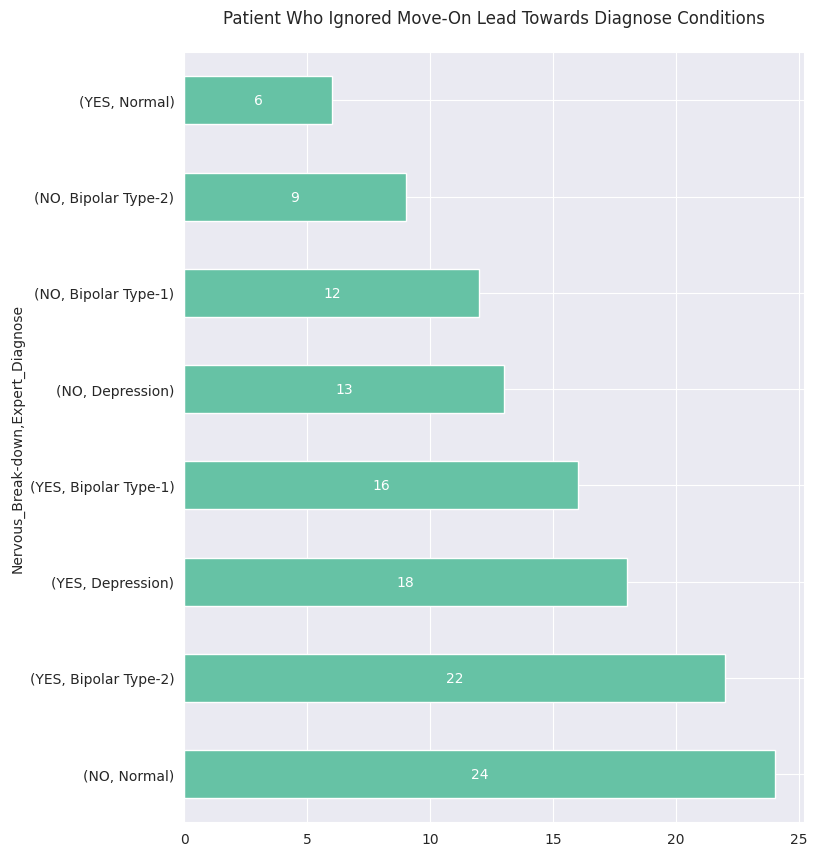

**************************************************************************************************************************************************************************
  Admit_Mistakes Expert_Diagnose  Counts
0             NO  Bipolar Type-1      19
1            YES          Normal      19
2             NO  Bipolar Type-2      16
3            YES      Depression      16
4             NO      Depression      15
5            YES  Bipolar Type-2      15
6             NO          Normal      11
7            YES  Bipolar Type-1       9 



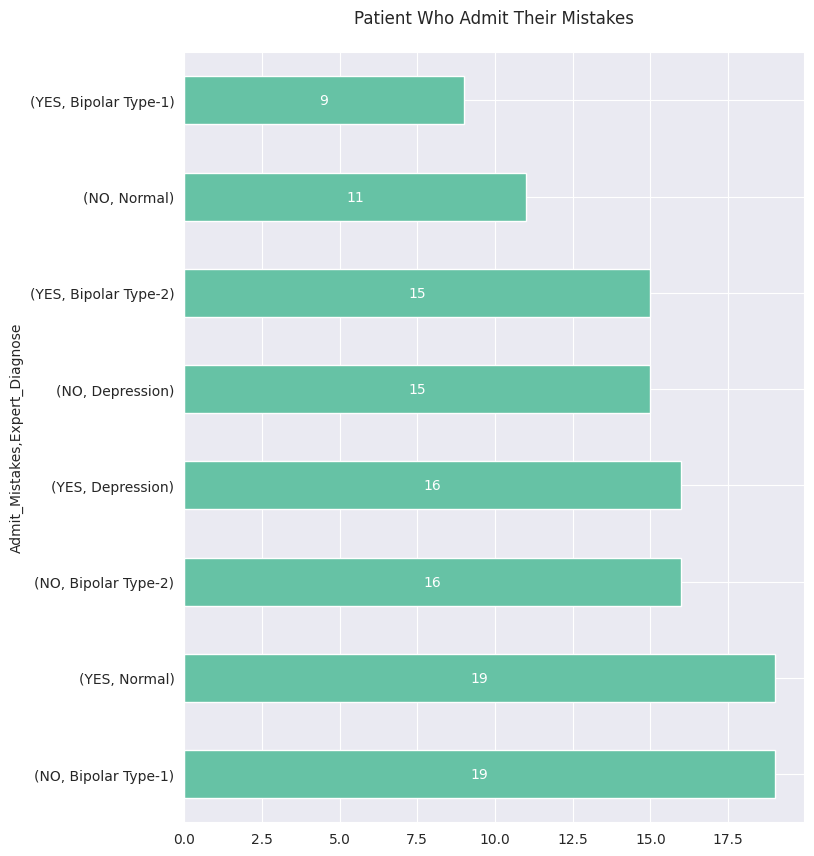

**************************************************************************************************************************************************************************
  Overthinking Expert_Diagnose  Counts
0          YES      Depression      23
1           NO          Normal      20
2          YES  Bipolar Type-2      17
3          YES  Bipolar Type-1      15
4           NO  Bipolar Type-2      14
5           NO  Bipolar Type-1      13
6          YES          Normal      10
7           NO      Depression       8 



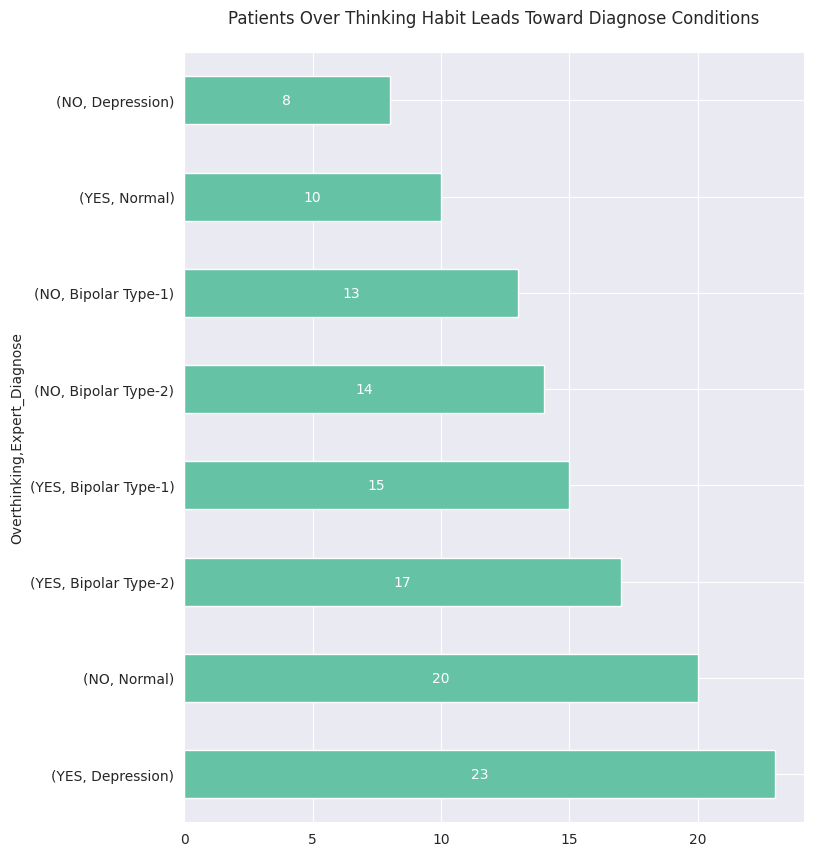

**************************************************************************************************************************************************************************
   Sexual_Activity Expert_Diagnose  Counts
0        5 From 10          Normal      12
1        2 From 10  Bipolar Type-2      10
2        3 From 10      Depression       8
3        6 From 10  Bipolar Type-1       8
4        4 From 10      Depression       8
5        4 From 10  Bipolar Type-2       7
6        8 From 10  Bipolar Type-1       7
7        7 From 10  Bipolar Type-1       6
8        6 From 10          Normal       5
9        5 From 10  Bipolar Type-1       5
10       7 From 10          Normal       5
11       4 From 10          Normal       5
12       3 From 10  Bipolar Type-2       5
13       2 From 10      Depression       5
14       8 From 10      Depression       3
15       5 From 10      Depression       3
16       3 From 10          Normal       3
17       1 From 10  Bipolar Type-2       3
18       7 F

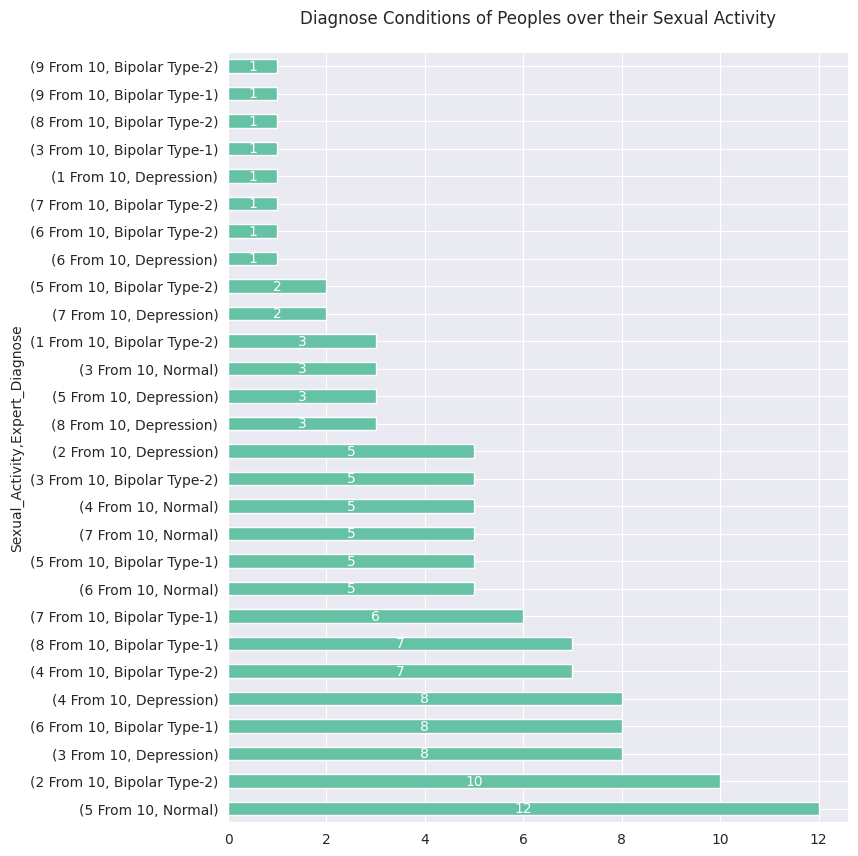

**************************************************************************************************************************************************************************
   Concentration Expert_Diagnose  Counts
0      4 From 10          Normal       9
1      4 From 10  Bipolar Type-1       8
2      2 From 10  Bipolar Type-2       8
3      4 From 10  Bipolar Type-2       8
4      4 From 10      Depression       8
5      7 From 10      Depression       7
6      2 From 10  Bipolar Type-1       7
7      5 From 10          Normal       7
8      3 From 10  Bipolar Type-2       6
9      5 From 10  Bipolar Type-2       5
10     5 From 10  Bipolar Type-1       5
11     7 From 10          Normal       5
12     2 From 10      Depression       5
13     6 From 10          Normal       4
14     3 From 10      Depression       4
15     5 From 10      Depression       4
16     6 From 10  Bipolar Type-1       3
17     1 From 10  Bipolar Type-1       3
18     1 From 10  Bipolar Type-2       2
19     6 

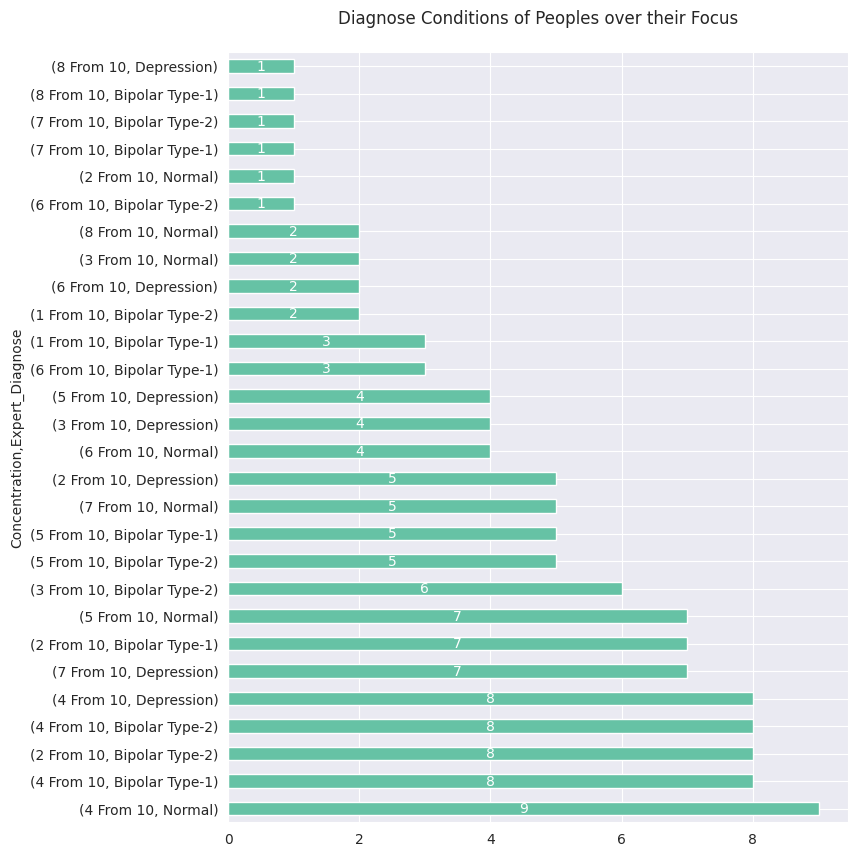

**************************************************************************************************************************************************************************
    Optimisim Expert_Diagnose  Counts
0   6 From 10          Normal      12
1   2 From 10      Depression      11
2   4 From 10  Bipolar Type-2      11
3   5 From 10          Normal      10
4   3 From 10      Depression       8
5   6 From 10  Bipolar Type-1       8
6   3 From 10  Bipolar Type-2       7
7   2 From 10  Bipolar Type-2       5
8   8 From 10  Bipolar Type-1       5
9   7 From 10  Bipolar Type-1       5
10  4 From 10      Depression       5
11  5 From 10  Bipolar Type-1       4
12  1 From 10  Bipolar Type-2       4
13  5 From 10  Bipolar Type-2       3
14  5 From 10      Depression       3
15  1 From 10      Depression       2
16  4 From 10  Bipolar Type-1       2
17  3 From 10          Normal       2
18  7 From 10          Normal       2
19  8 From 10          Normal       2
20  9 From 10  Bipolar Type-1  

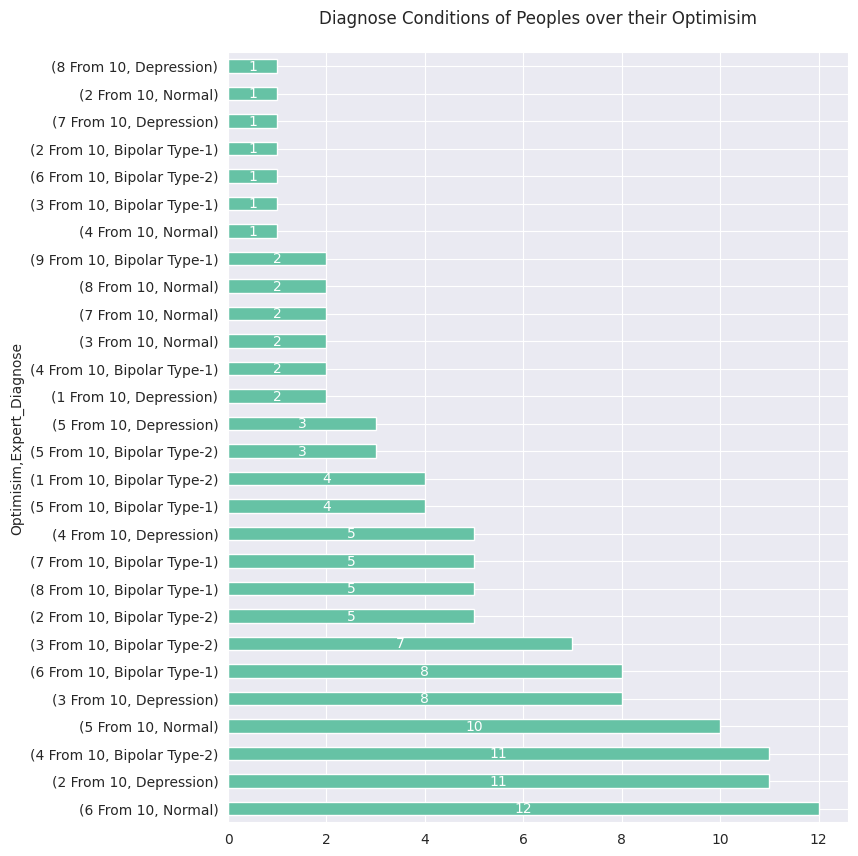

In [ ]:
# Patients who repect their Authors
sns.set_style("darkgrid")
sns.set_palette("Set2")
plt.figure(figsize=(8,10))
print(df.groupby("Exhausted")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"))
bar = df.groupby("Exhausted")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Exhusetd Pateint Across Expert Diagnose\n")
plt.show()
print("*"*170)

plt.figure(figsize=(8,10))
print(df.groupby("Authority_Respect")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Authority_Respect")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Respect of Authors from Pateints\n")
plt.show()
print("*"*170)

# Patients with their sleep disorder
plt.figure(figsize=(8,10))
print(df.groupby("Sleep_dissorder")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Sleep_dissorder")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Sleep Disorders Experienced by Patient which leads to Diagnose Conditions\n")
plt.show()
print("*"*170)

# Aggressive response of people would be consider diagnose conditions
plt.figure(figsize=(8,10))
print(df.groupby("Aggressive_Response")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Aggressive_Response")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patient Response Which Lead Towards Diagnose Conditions\n")
plt.show()
print("*"*170)

#
plt.figure(figsize=(8,10))
print(df.groupby("Ignore_&_Move-On")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Ignore_&_Move-On")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patient Who Ignored Move-On Lead Towards Diagnose Conditions\n")
plt.show()
print("*"*170)

# pateints who nervouse and break down and adds on towrds Diagnose Conditions
plt.figure(figsize=(8,10))
print(df.groupby("Nervous_Break-down")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Nervous_Break-down")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patient Who Ignored Move-On Lead Towards Diagnose Conditions\n")
plt.show()
print("*"*170)

# patients who admit their mistakes:
plt.figure(figsize=(8,10))
print(df.groupby("Admit_Mistakes")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Admit_Mistakes")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patient Who Admit Their Mistakes\n")
plt.show()
print("*"*170)

# Overthinking Patients which leads towards Expert Diagnose:
plt.figure(figsize=(8,10))
print(df.groupby("Overthinking")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Overthinking")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Patients Over Thinking Habit Leads Toward Diagnose Conditions\n")
plt.show()
print("*"*170)

# Diagnose Conditions of Patients Across sexual activity
plt.figure(figsize=(8,10))
print(df.groupby("Sexual_Activity")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Sexual_Activity")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Diagnose Conditions of Peoples over their Sexual Activity\n")
plt.show()
print("*"*170)

# Pateints Ability to Cocentrate ,Focus:
plt.figure(figsize=(8,10))
print(df.groupby("Concentration")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Concentration")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Diagnose Conditions of Peoples over their Focus\n")
plt.show()
print("*"*170)

# patients attitude in real world
plt.figure(figsize=(8,10))
print(df.groupby("Optimisim")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).reset_index(name="Counts"),"\n")
bar = df.groupby("Optimisim")[['Expert_Diagnose']].value_counts().sort_values(ascending=False).plot.barh()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Diagnose Conditions of Peoples over their Optimisim\n")
plt.show()

In [6]:
# lets chcek the Sadness impact on mental health:
data = pd.crosstab(df['Sadness'],df['Expert_Diagnose']).sort_values(by=['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal'])
data

Expert_Diagnose,Bipolar Type-1,Bipolar Type-2,Depression,Normal
Sadness,,,,
Most-Often,0,8,12,0
Usually,7,16,15,4
Seldom,9,1,0,6
Sometimes,12,6,4,20


Text(0.5, 1.0, 'Sadness Impact Over Mental Health\n')

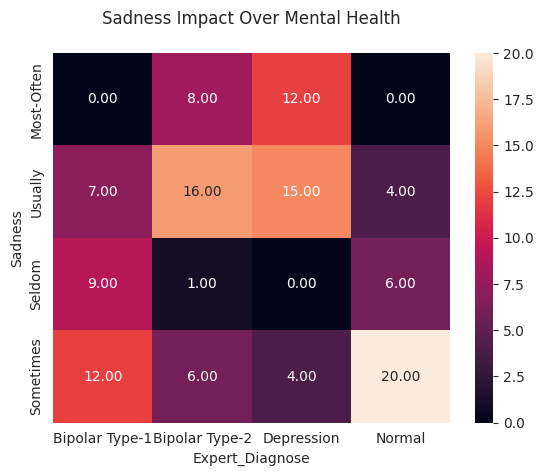

In [ ]:
sns.heatmap(data=data,annot=True,fmt=".2f")
plt.title("Sadness Impact Over Mental Health\n")

Metnal Health Of Patient Accroding to:
Index(['Patient_Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep_dissorder',
       'Mood_Swing', 'Suicidal_thoughts', 'Anorxia', 'Authority_Respect',
       'Try-Explanation', 'Aggressive_Response', 'Ignore_&_Move-On',
       'Nervous_Break-down', 'Admit_Mistakes', 'Overthinking',
       'Sexual_Activity', 'Concentration', 'Optimisim', 'Expert_Diagnose'],
      dtype='object')



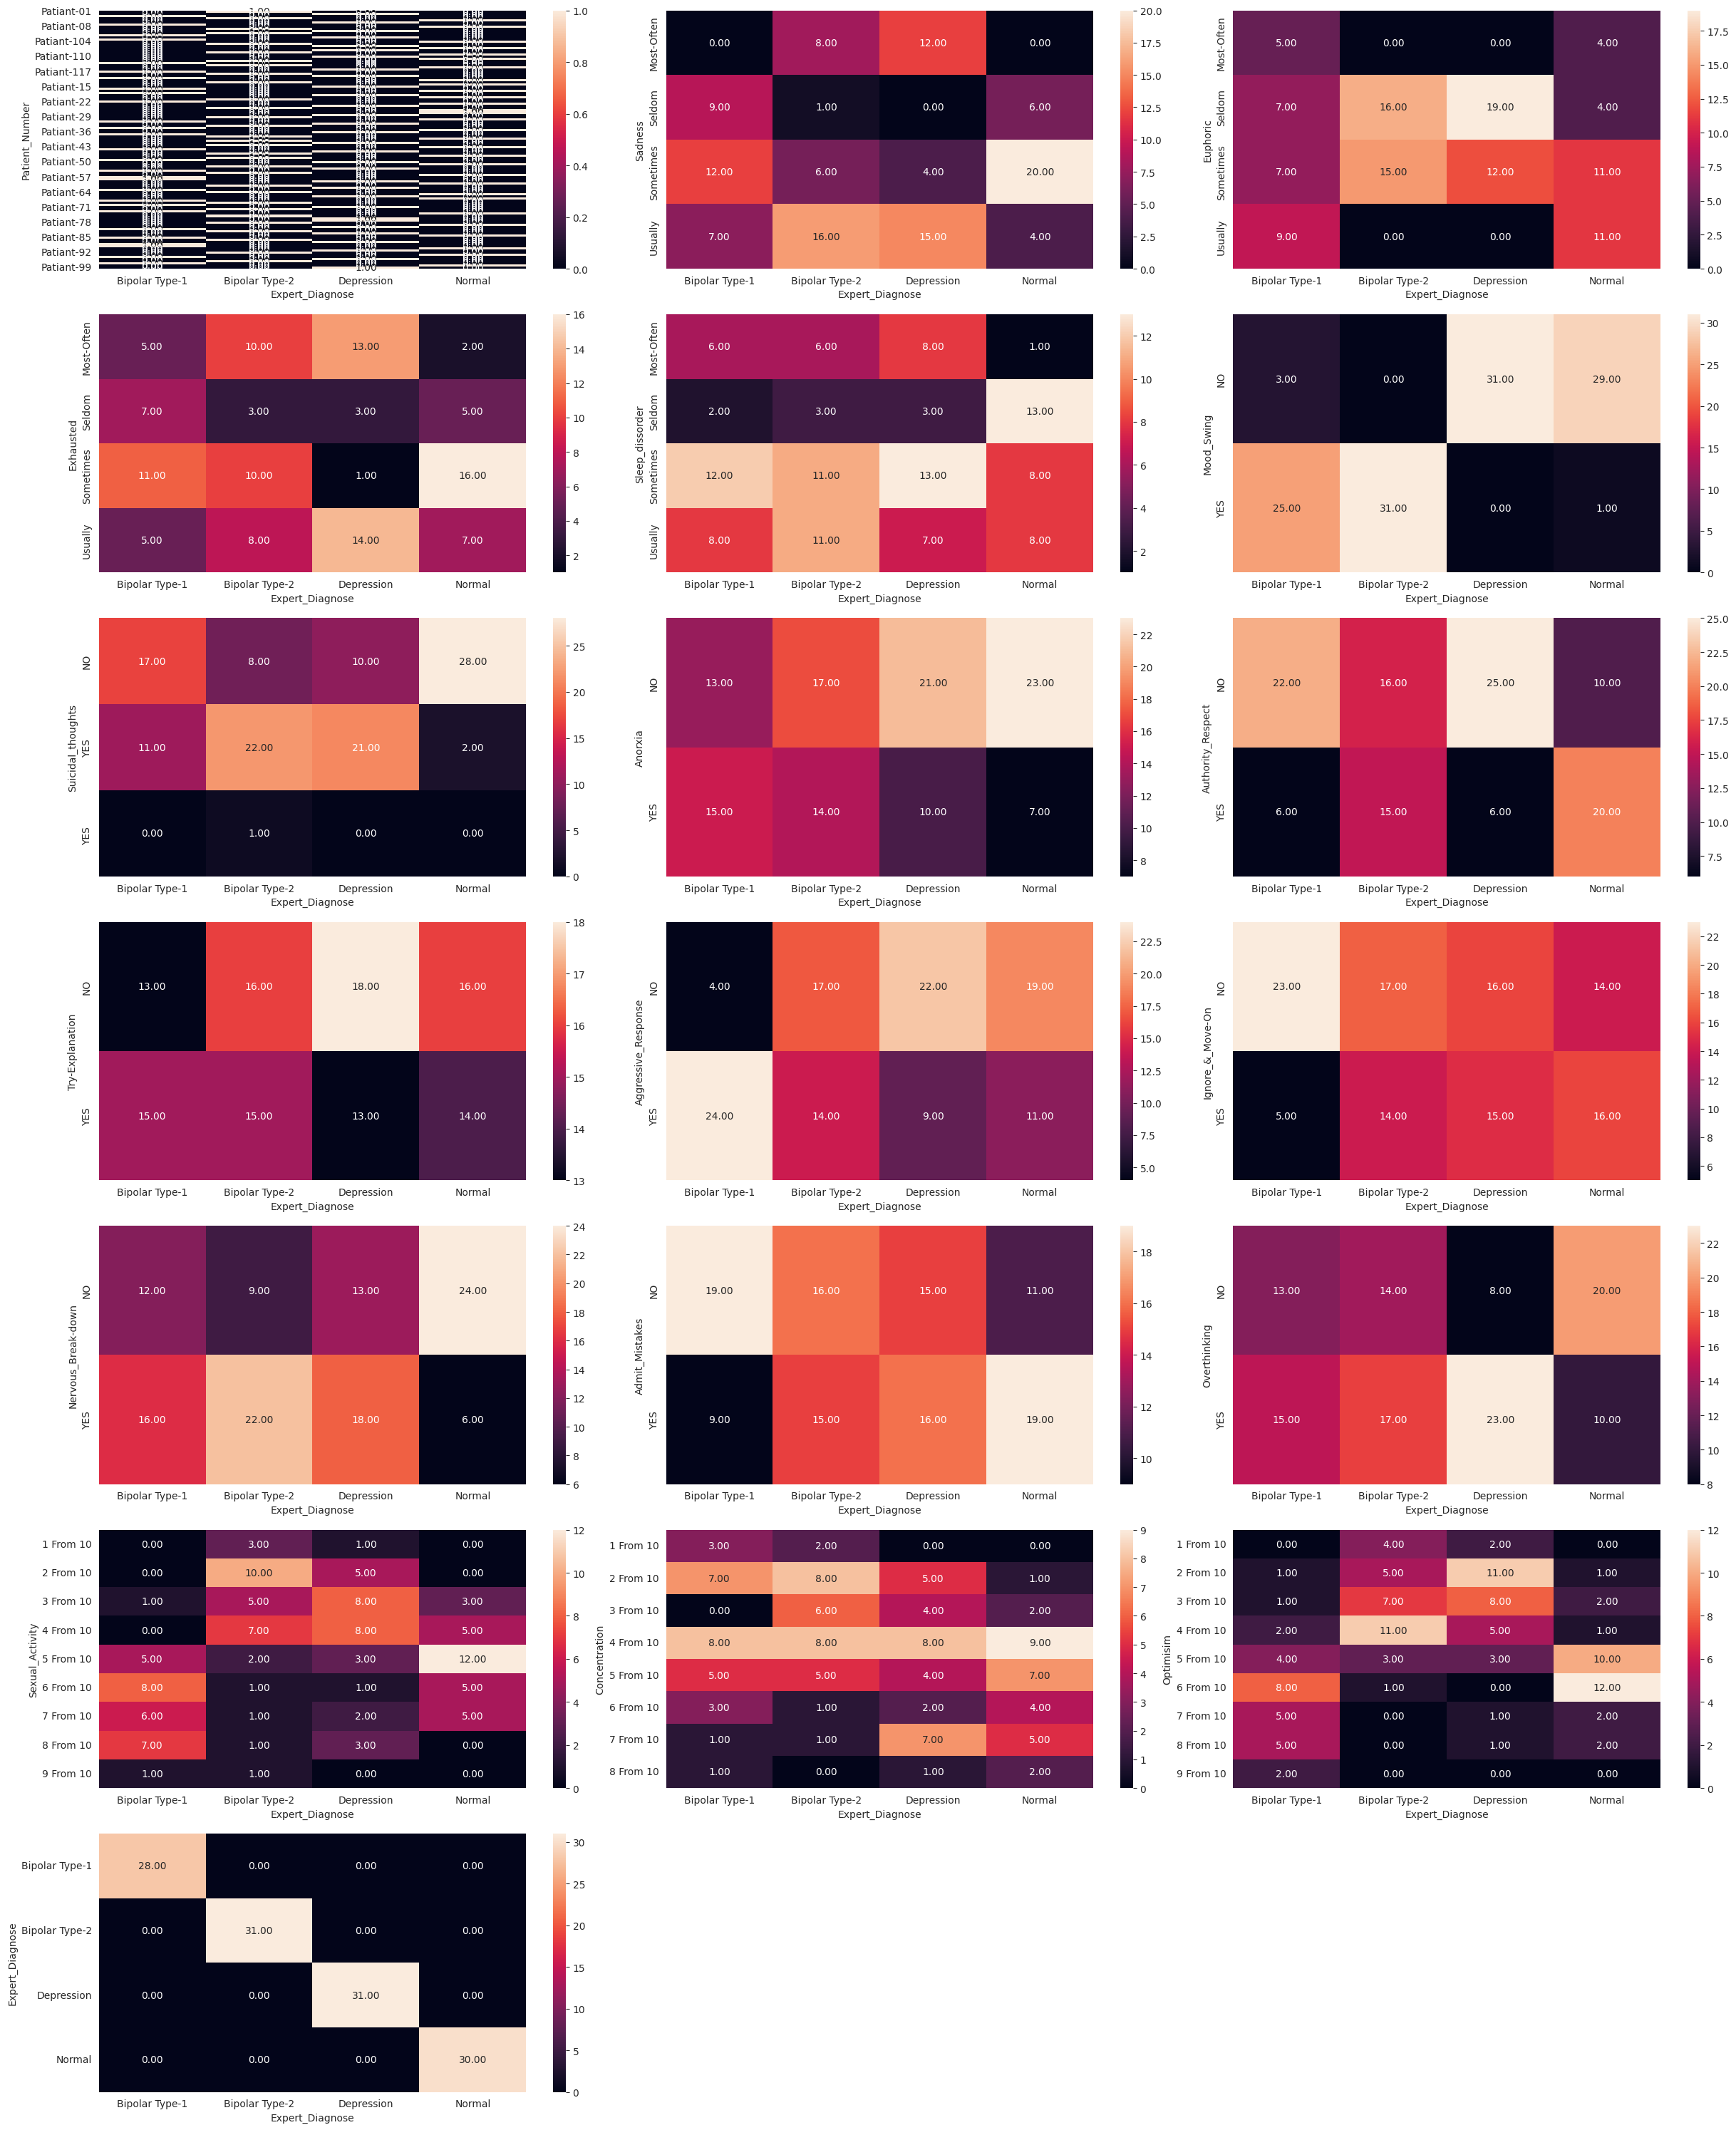

In [ ]:
print(f"Metnal Health Of Patient Accroding to:\n{df.columns}\n")
plt.figure(figsize=(25,30))
sns.set_style("darkgrid")
sns.set_palette("Set2")
col = df.columns
i = 1
for col in col:
  plt.subplot(7,3,i)
  data = pd.crosstab(df[col],df['Expert_Diagnose'])
  sns.heatmap(data=data,annot=True,fmt=".2f")
  i+=1
  plt.tight_layout()

In [7]:
# here we have some columns with ordinal and Nominal categorical so first lets encode them:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder

# for splitting the data:
from sklearn.model_selection import train_test_split

# for multpleclasses we use  model
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# for evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [8]:
X = df.iloc[:,:-1].drop(columns=['Patient_Number'])
y = df['Expert_Diagnose']

In [9]:
df.groupby(['Sadness','Euphoric','Exhausted','Sleep_dissorder','Sexual_Activity','Concentration','Optimisim'])[['Expert_Diagnose']].value_counts()

Sadness     Euphoric   Exhausted   Sleep_dissorder  Sexual_Activity  Concentration  Optimisim  Expert_Diagnose
Most-Often  Seldom     Most-Often  Most-Often       2 From 10        2 From 10      1 From 10  Bipolar Type-2     1
                                                                                    2 From 10  Bipolar Type-2     1
                                                                                               Depression         1
                                                    3 From 10        4 From 10      1 From 10  Depression         1
                                                    4 From 10        3 From 10      3 From 10  Depression         1
                                                                                                                 ..
Usually     Sometimes  Usually     Sometimes        4 From 10        4 From 10      2 From 10  Depression         1
                                                    8 From 10        2 From 1

In [11]:
# lets encode the data:
transformer = ColumnTransformer(transformers=[
    ("OneHot",OneHotEncoder(drop="first"),['Mood_Swing','Suicidal_thoughts','Anorxia','Authority_Respect','Try-Explanation','Aggressive_Response','Ignore_&_Move-On','Nervous_Break-down','Admit_Mistakes','Overthinking']),
    ("Ord",OrdinalEncoder(),['Sadness','Euphoric','Exhausted','Sleep_dissorder','Sexual_Activity','Concentration','Optimisim']),
],remainder='passthrough')

In [12]:
X_transformed = transformer.fit_transform(X)

In [13]:
# split the data:
x_train,x_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42)

In [14]:
x_train.shape,x_test.shape

((96, 18), (24, 18))

In [15]:
# build the model:
MultiClass = MultinomialNB()

In [16]:
# train:
MultiClass.fit(x_train,y_train)

MultinomialNB()

In [17]:
# lets check the data accuracy:
MultiClass.score(x_train,y_train)*100

88.54166666666666

In [ ]:
# lets test the data:
y_pred = MultiClass.predict(x_test)
y_pred

array(['Depression', 'Bipolar Type-1', 'Depression', 'Depression',
       'Depression', 'Depression', 'Normal', 'Normal', 'Depression',
       'Depression', 'Depression', 'Bipolar Type-1', 'Bipolar Type-1',
       'Bipolar Type-1', 'Normal', 'Bipolar Type-2', 'Depression',
       'Bipolar Type-2', 'Bipolar Type-1', 'Bipolar Type-2', 'Depression',
       'Bipolar Type-2', 'Depression', 'Depression'], dtype='<U14')

In [ ]:
# lets see th acutal data:
y_test.values

array(['Depression', 'Bipolar Type-2', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Depression', 'Depression',
       'Depression', 'Bipolar Type-1', 'Bipolar Type-1', 'Bipolar Type-1',
       'Normal', 'Bipolar Type-2', 'Depression', 'Bipolar Type-2',
       'Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Bipolar Type-2',
       'Depression', 'Depression'], dtype=object)

In [ ]:
# lets see the accuracy of model:
accuracy_score(y_test,y_pred)*100

79.16666666666666

In [ ]:
# lets check the percision score:
# basicall precision is used to check the positive prediction done by the model by catching the Fale positives means wrongly positive Decision..
# if we have multple classes in output then we have to check the macro average It gives whole class average
precision_score(y_test,y_pred,average="macro")*100

86.66666666666667

In [ ]:
recall_score(y_test,y_pred,average='macro')*100

80.71428571428571

In [ ]:
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

Bipolar Type-1       0.80      1.00      0.89         4
Bipolar Type-2       1.00      0.80      0.89         5
    Depression       0.67      1.00      0.80         8
        Normal       1.00      0.43      0.60         7

      accuracy                           0.79        24
     macro avg       0.87      0.81      0.79        24
  weighted avg       0.86      0.79      0.78        24



Text(0.5, 1.0, 'Chceking the positive and Negative Predictions By the Model\n')

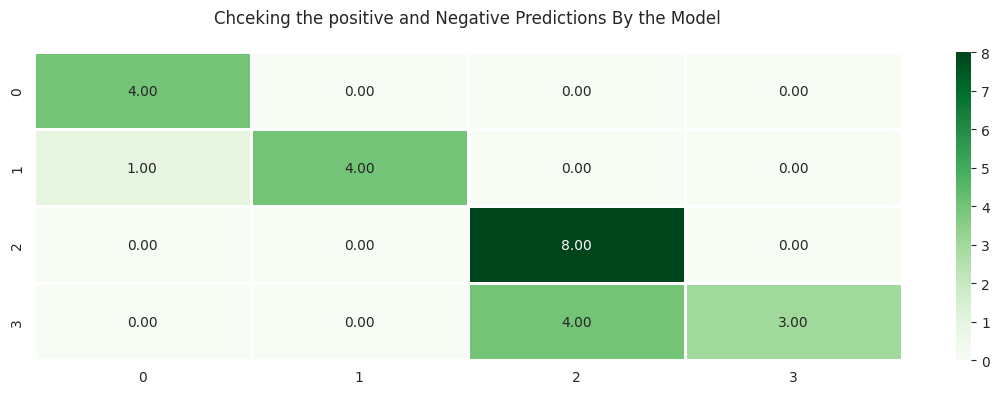

In [ ]:
plt.figure(figsize=(14,4))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt=".2f",cmap="Greens",linewidth=0.8)
plt.title("Chceking the positive and Negative Predictions By the Model\n")

In [ ]:
# lets see the errors between Actual VS Predicted:
ndf = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
act = ndf.Actual.value_counts().reset_index(name="Counts")
pred = ndf.Predicted.value_counts().reset_index(name="Counts")

In [ ]:
act,pred

(            index  Counts
 0      Depression       8
 1          Normal       7
 2  Bipolar Type-2       5
 3  Bipolar Type-1       4,
             index  Counts
 0      Depression      12
 1  Bipolar Type-1       5
 2  Bipolar Type-2       4
 3          Normal       3)

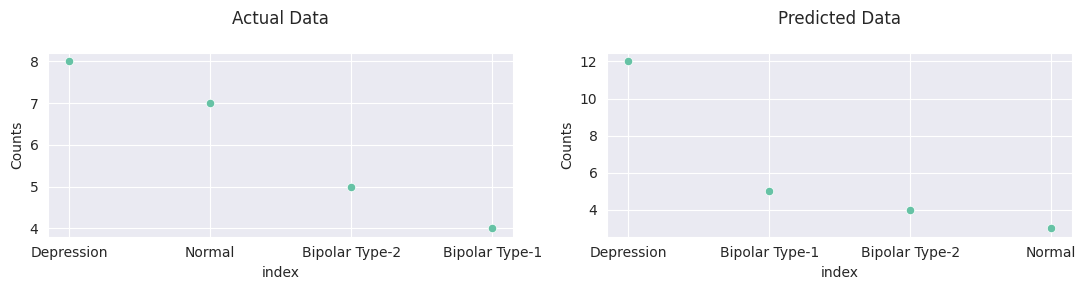

In [ ]:
plt.figure(figsize=(11,3))
plt.subplot(121)
sns.scatterplot(data=act,x="index",y="Counts")
plt.title("Actual Data\n")
plt.subplot(122)
sns.scatterplot(data=pred,x="index",y="Counts")
plt.title("Predicted Data\n")
plt.tight_layout()

In [ ]:
# lets build the Decision Tree Classifiers:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [ ]:
# train:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# lets check the data accuracy in DecisionTree
clf.score(x_train,y_train)*100

100.0

In [ ]:
# lets test the data:
yClf_pred = clf.predict(x_test)
yClf_pred

array(['Depression', 'Normal', 'Normal', 'Depression', 'Depression',
       'Bipolar Type-1', 'Normal', 'Normal', 'Depression',
       'Bipolar Type-1', 'Depression', 'Bipolar Type-1', 'Bipolar Type-1',
       'Bipolar Type-1', 'Normal', 'Bipolar Type-2', 'Depression',
       'Bipolar Type-2', 'Normal', 'Bipolar Type-2', 'Depression',
       'Bipolar Type-2', 'Depression', 'Depression'], dtype=object)

In [ ]:
y_test.values

array(['Depression', 'Bipolar Type-2', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Depression', 'Depression',
       'Depression', 'Bipolar Type-1', 'Bipolar Type-1', 'Bipolar Type-1',
       'Normal', 'Bipolar Type-2', 'Depression', 'Bipolar Type-2',
       'Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Bipolar Type-2',
       'Depression', 'Depression'], dtype=object)

In [ ]:
# lets see the model accuracy:
accuracy_score(y_test,yClf_pred)*100

75.0

In [ ]:
print(classification_report(y_test,yClf_pred))

                precision    recall  f1-score   support

Bipolar Type-1       0.60      0.75      0.67         4
Bipolar Type-2       1.00      0.80      0.89         5
    Depression       0.78      0.88      0.82         8
        Normal       0.67      0.57      0.62         7

      accuracy                           0.75        24
     macro avg       0.76      0.75      0.75        24
  weighted avg       0.76      0.75      0.75        24



In [ ]:
classes = sorted(y.unique())
classes

['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal']

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep_dissorder', 'Mood_Swing',
       'Suicidal_thoughts', 'Anorxia', 'Authority_Respect', 'Try-Explanation',
       'Aggressive_Response', 'Ignore_&_Move-On', 'Nervous_Break-down',
       'Admit_Mistakes', 'Overthinking', 'Sexual_Activity', 'Concentration',
       'Optimisim'],
      dtype='object') 



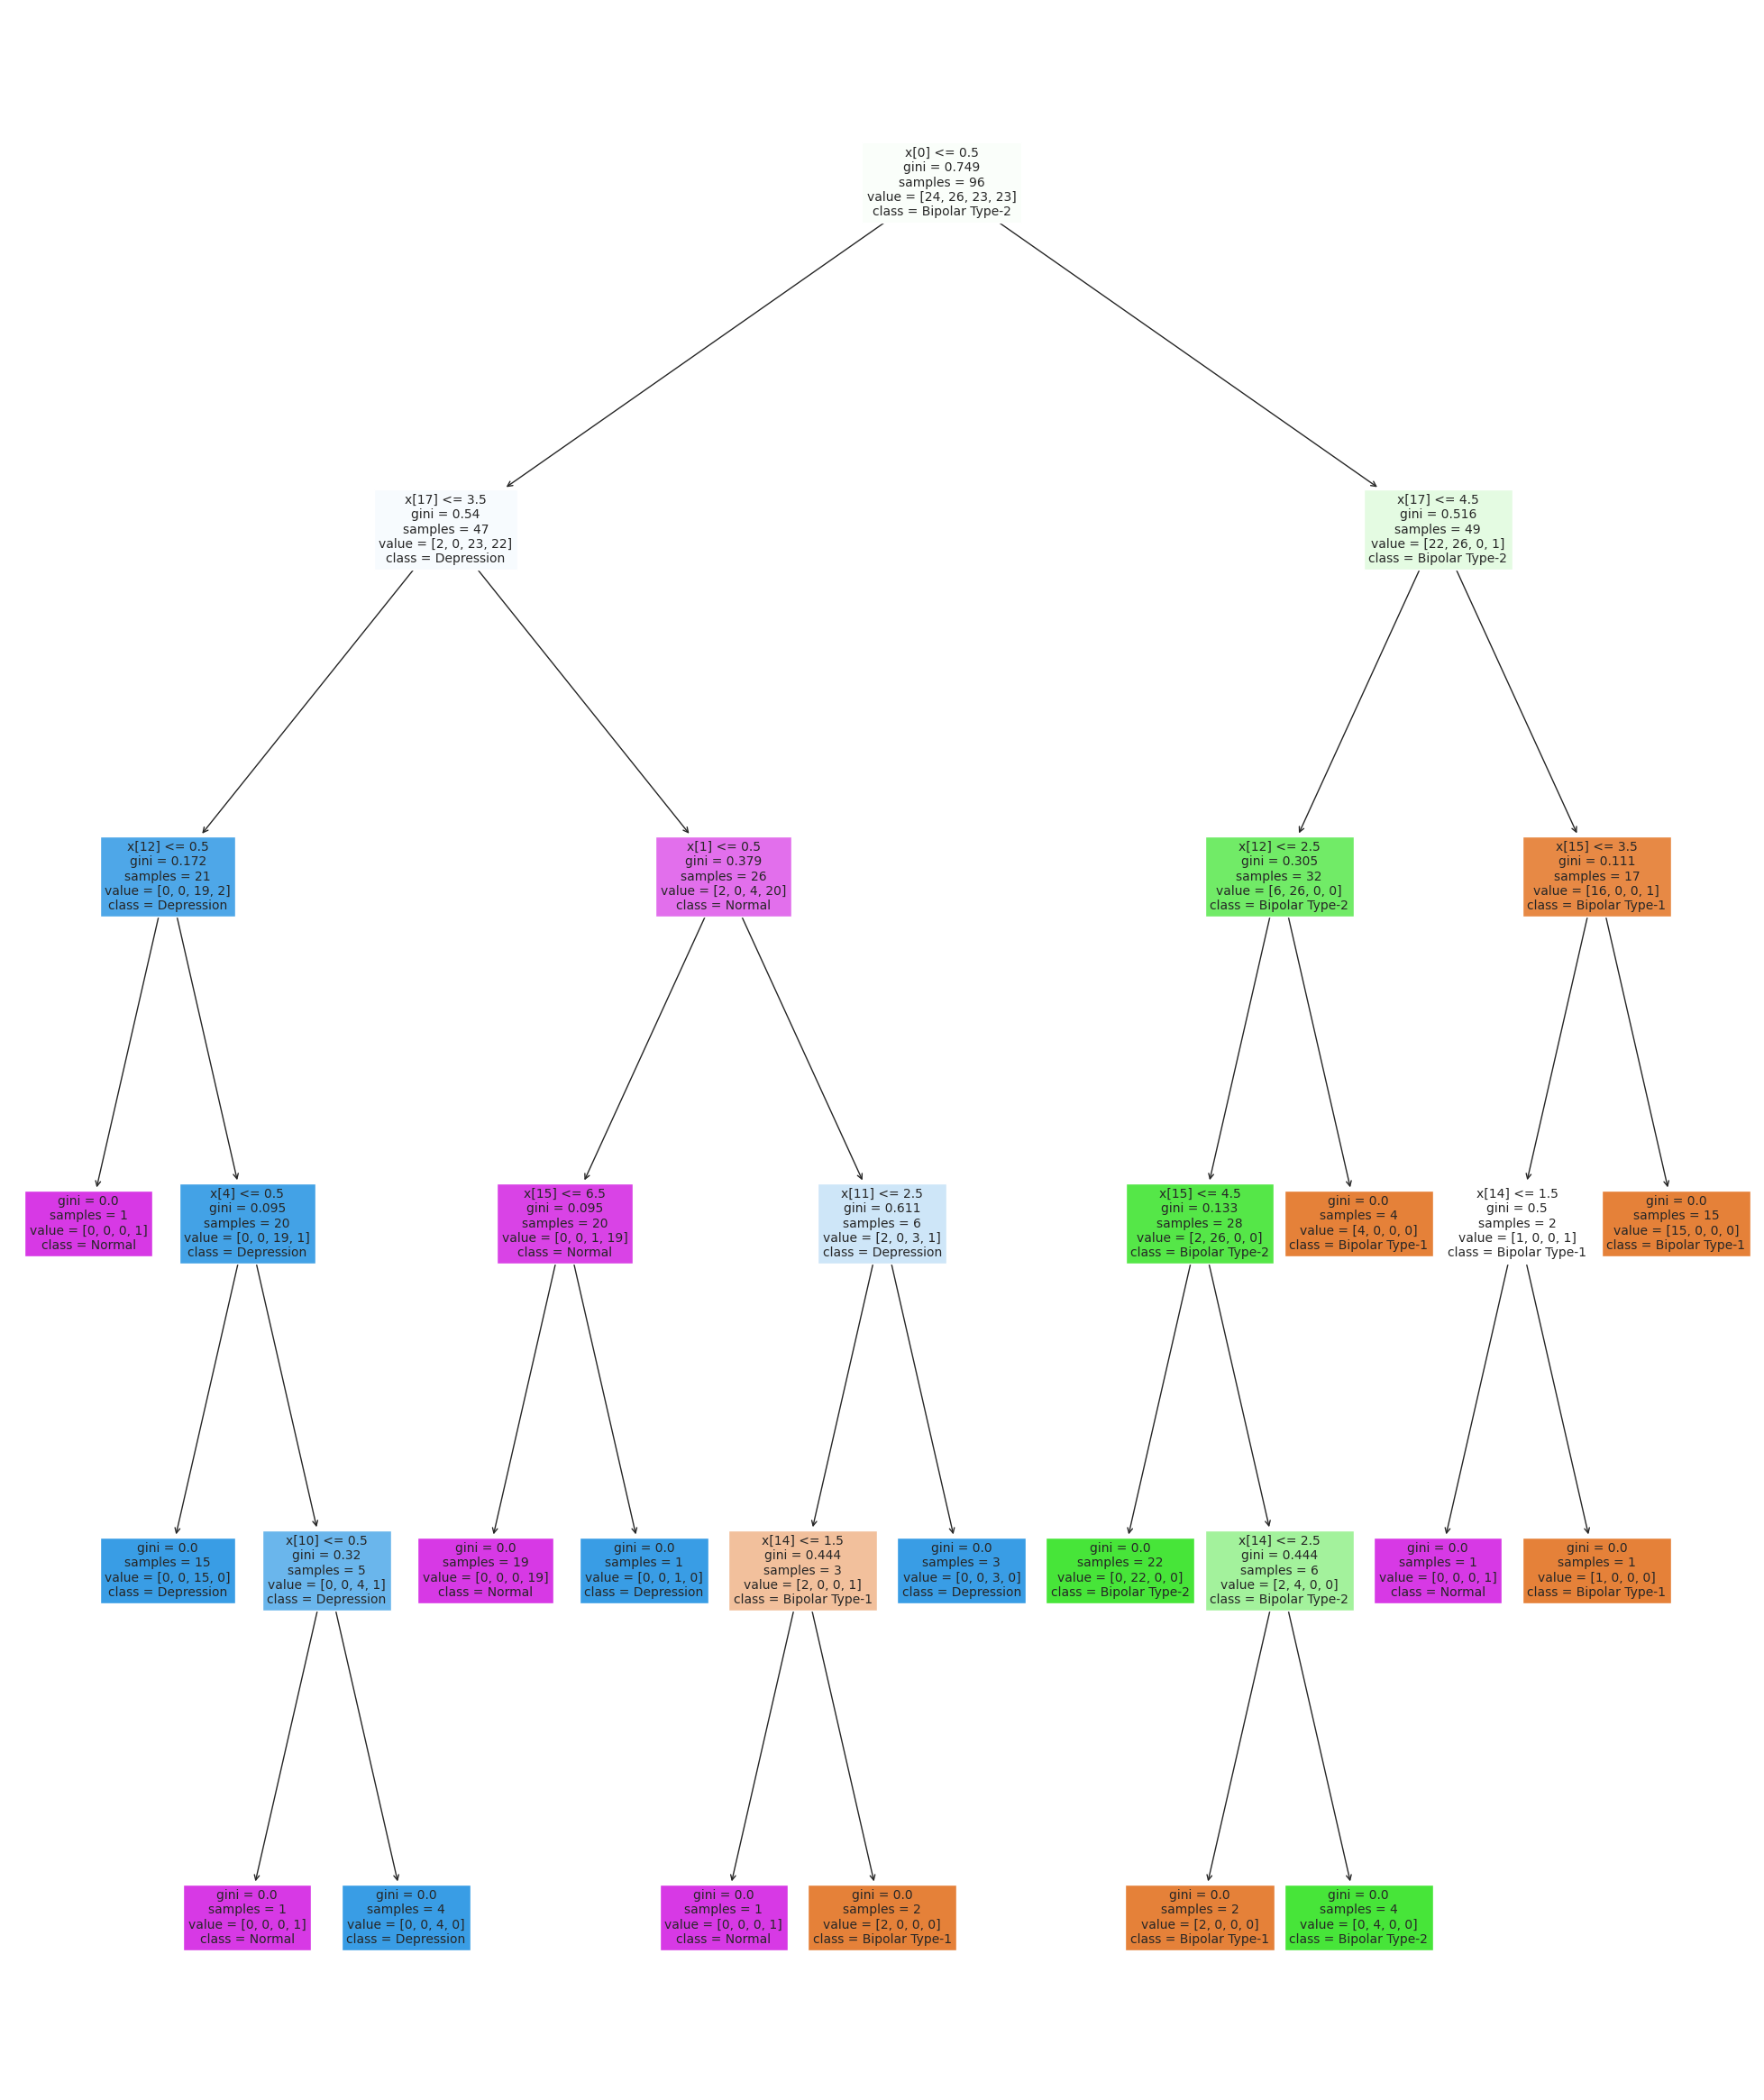

In [ ]:
# lets plot the tree:
print(X.columns,"\n")
plt.figure(figsize=(25,30))
tree.plot_tree(clf,class_names=classes,filled=True);

In [ ]:
# lets build the logistic regression model:
Log = LogisticRegression(multi_class="multinomial",solver="lbfgs")
Log

LogisticRegression(multi_class='multinomial')

In [ ]:
# now we have to encode the output data
Log.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
# test:
yL_pred = Log.predict(x_test)
yL_pred

array(['Depression', 'Bipolar Type-1', 'Normal', 'Depression',
       'Depression', 'Depression', 'Normal', 'Normal', 'Depression',
       'Depression', 'Depression', 'Bipolar Type-1', 'Bipolar Type-1',
       'Bipolar Type-1', 'Normal', 'Bipolar Type-2', 'Depression',
       'Bipolar Type-2', 'Normal', 'Bipolar Type-2', 'Depression',
       'Bipolar Type-2', 'Depression', 'Depression'], dtype=object)

In [ ]:
y_test.values

array(['Depression', 'Bipolar Type-2', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Depression', 'Depression',
       'Depression', 'Bipolar Type-1', 'Bipolar Type-1', 'Bipolar Type-1',
       'Normal', 'Bipolar Type-2', 'Depression', 'Bipolar Type-2',
       'Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Bipolar Type-2',
       'Depression', 'Depression'], dtype=object)

In [ ]:
# lets check the data and model accuracy:
Log.score(x_train,y_train)*100

95.83333333333334

In [ ]:
# lets see the accuracy of model:
accuracy_score(y_test,yL_pred)*100

79.16666666666666

In [ ]:
print(classification_report(y_test,yL_pred))

                precision    recall  f1-score   support

Bipolar Type-1       0.75      0.75      0.75         4
Bipolar Type-2       1.00      0.80      0.89         5
    Depression       0.73      1.00      0.84         8
        Normal       0.80      0.57      0.67         7

      accuracy                           0.79        24
     macro avg       0.82      0.78      0.79        24
  weighted avg       0.81      0.79      0.79        24



In [ ]:
df.head()

,Patient_Number,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_&_Move-On,Nervous_Break-down,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
